### Time to get your hands dirty. Galaxy vs quasars

We're now going to classify galaxy vs quasars in the Sloan Digital Sky Survey.
SDSS observed in four bands:
    
#### Tasks

The dataset is at `solutions/galaxyquasar.csv` (I extracted it from the SDSS database using the SQL query reported [here](https://www.astroml.org/_modules/astroML/datasets/sdss_galaxy_colors.html#fetch_sdss_galaxy_colors))

- First, read the datafile.
- Create arrays for the $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create an array with the class labels where galaxy=$0$ and quasar=$1$. 
- Classify the dataset against the target label.
- Try some of the classification methods we've seen so far and evaluate the performance using the ROC curve.
- Remember to split the dataset into training and validation...

##### Food for thought
- Try using different colors (a subset of them first, than all together). Which is the most important feature?
- What are the colors that better satisfy or invalidate the "Naive" assumption of independence between the attributes?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroML.utils import split_samples
from astroML.classification import GMMBayes
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from astroML.utils import completeness_contamination
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("/home/sara/astrostatistics/astrostatistics_bicocca_2022/solutions/galaxyquasar.csv")
print(data)

              u         g         r         i         z   class        z1  \
0      18.97213  18.53676  18.58280  18.34936  18.29215     QSO  0.522819   
1      19.24592  17.47646  16.47817  16.04472  15.68851  GALAXY  0.122846   
2      19.43536  17.70268  16.91565  16.58327  16.39128  GALAXY  0.000000   
3      19.31626  18.18312  17.39591  16.94549  16.65395  GALAXY  0.147435   
4      19.28828  19.11188  18.88937  18.80013  18.49183     QSO  2.011455   
...         ...       ...       ...       ...       ...     ...       ...   
49995  19.37295  18.12382  17.39886  16.98503  16.70585  GALAXY  0.113016   
49996  18.52021  16.88262  16.03280  15.56884  15.22454  GALAXY  0.085063   
49997  18.62718  17.30876  16.87371  16.62399  16.42296  GALAXY  0.054429   
49998  19.55140  18.27711  17.62101  17.21947  17.03347  GALAXY  0.112571   
49999  18.80772  17.75751  17.40500  17.21650  17.12295  GALAXY  0.043652   

           zerr  
0      0.000155  
1      0.000028  
2      0.000000  
3  

In [3]:
u_g = np.array(data['u']-data['g'])
g_r = np.array(data['g']-data['r'])
r_i = np.array(data['r']-data['i'])
i_z = np.array(data['i']-data['z'])

# galaxy = 0, quasar = 1
label = np.empty(len(u_g))
for i in range(len(u_g)):
    if data['class'][i] == 'QSO':
        label[i] = 1
    else:
        label[i] = 0

In [4]:
colors = np.concatenate((u_g, g_r, r_i, i_z)).reshape(4, len(u_g)).T
print (colors)

[[ 0.43537 -0.04604  0.23344  0.05721]
 [ 1.76946  0.99829  0.43345  0.35621]
 [ 1.73268  0.78703  0.33238  0.19199]
 ...
 [ 1.31842  0.43505  0.24972  0.20103]
 [ 1.27429  0.6561   0.40154  0.186  ]
 [ 1.05021  0.35251  0.1885   0.09355]]


In [5]:
Ncomp = [1, 5]
Ncolors = np.arange(1, len(colors[0]) + 1 )

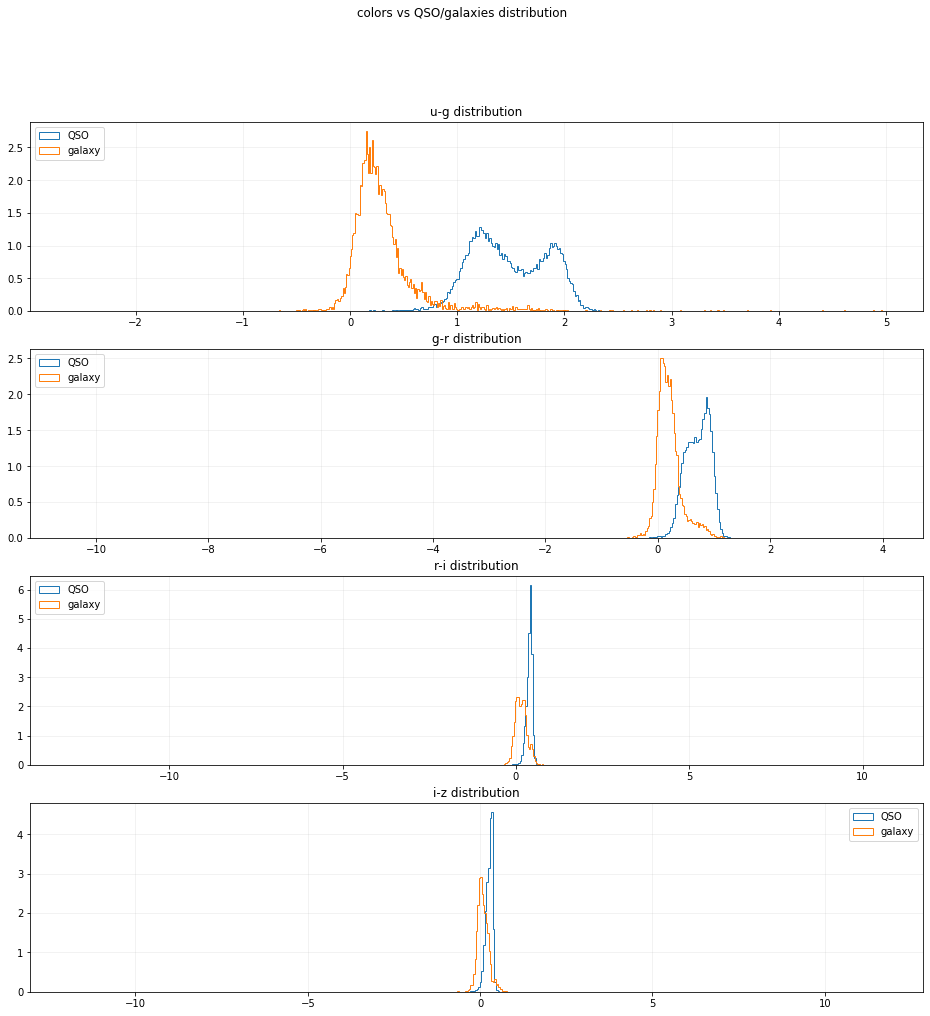

In [6]:
color_names = ['u-g', 'g-r', 'r-i', 'i-z']
fig, axs = plt.subplots(4, figsize = (16,16))
fig.suptitle('colors vs QSO/galaxies distribution')
for nhist in range(len(Ncolors)):
    axs[nhist].hist(colors[np.where(label==0),nhist].ravel(), histtype='step', bins = 500, density = True, label = 'QSO')
    axs[nhist].hist(colors[np.where(label==1),nhist].ravel(), histtype='step', bins = 500, density = True, label = 'galaxy')
    axs[nhist].set_title(color_names[nhist] + ' distribution')
    axs[nhist].legend()
    
    axs[nhist].grid(alpha = 0.2)

In [7]:
(colors_train, colors_test), (label_train, label_test) = split_samples(colors, label, [0.6, 0.4],
                                                     random_state=0)


N_tot = len(label)
N_galaxies = np.sum(label == 0)
N_quasars = np.sum(label == 1)
N_train = len(colors_train)
N_test = len(colors_test)
N_plot = 5000 + N_galaxies
print((colors_train.T[0]))
print((label_train).shape)
print((label_test).shape)


[0.19136 1.24156 0.46168 ... 1.48528 1.24578 0.97571]
(30000,)
(20000,)


In [8]:
classifier = ({"Gaussian Naive Bayes": GaussianNB,
              "LDA": LDA,
               "QDA": QDA,
              "GMM Bayes": GMMBayes,
             "KNearest Neighbors": KNeighborsClassifier })

keys = list(classifier.keys())

Color u-g - Classifier Gaussian Naive Bayes| Completeness = 0.9309 | Contamination = 0.0609
Color u-g - Classifier LDA| Completeness = 0.9316 | Contamination = 0.0618
Color u-g - Classifier QDA| Completeness = 0.9309 | Contamination = 0.0609
Color u-g - Classifier GMM Bayes| Completeness = 0.9309 | Contamination = 0.0609
Color u-g - Classifier KNearest Neighbors| Completeness = 0.9159 | Contamination = 0.0581
Color g-r - Classifier Gaussian Naive Bayes| Completeness = 0.5830 | Contamination = 0.1055
Color g-r - Classifier LDA| Completeness = 0.5914 | Contamination = 0.1088
Color g-r - Classifier QDA| Completeness = 0.5827 | Contamination = 0.1055
Color g-r - Classifier GMM Bayes| Completeness = 0.5830 | Contamination = 0.1055
Color g-r - Classifier KNearest Neighbors| Completeness = 0.7191 | Contamination = 0.1792
Color r-i - Classifier Gaussian Naive Bayes| Completeness = 0.1054 | Contamination = 0.1541
Color r-i - Classifier LDA| Completeness = 0.0464 | Contamination = 0.1890
Color r

(0.2, 0.98)

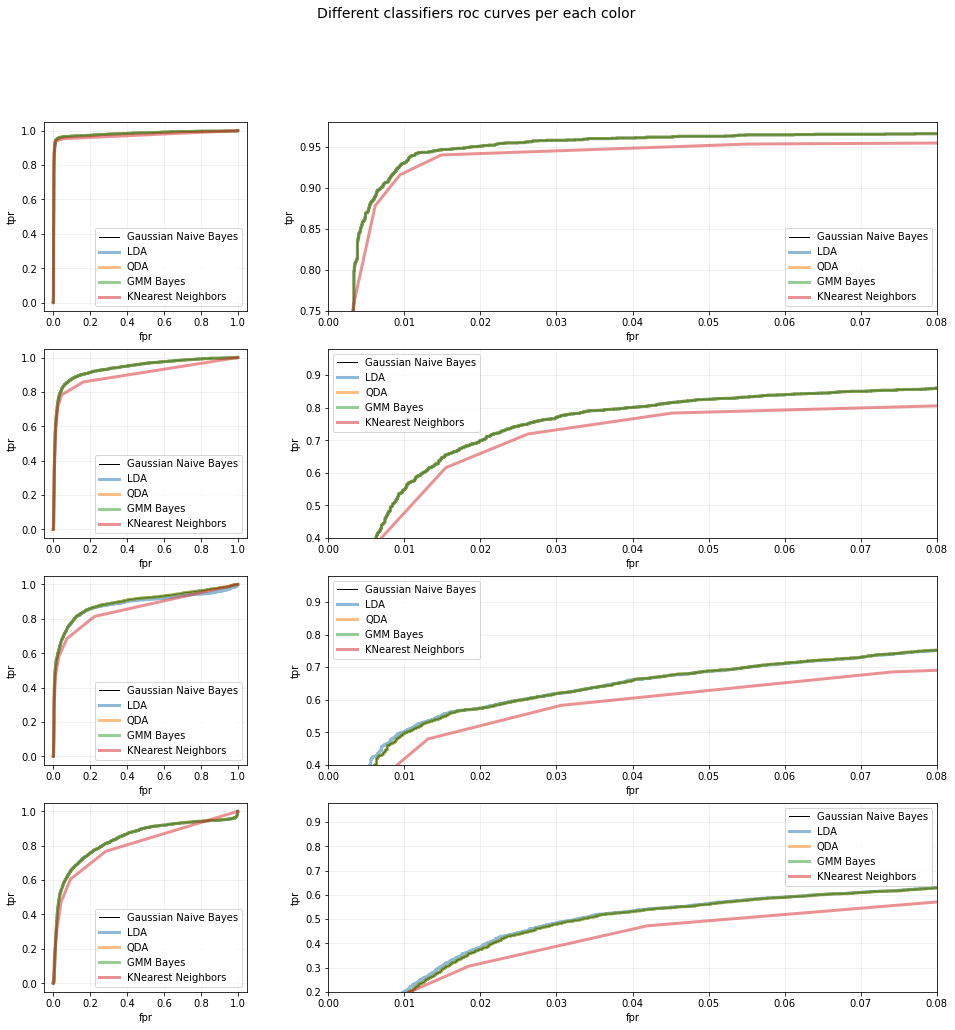

In [9]:
fig, axs = plt.subplots(4, 2, gridspec_kw={'width_ratios': [1, 3]}, figsize = (16,16))
fig.suptitle("Different classifiers roc curves per each color", fontsize=14)
for color in range(len(colors.T)):
    for name, method in classifier.items():
        clf = method()
        ncomp = 2
        clf.fit(colors_train.T[color][:, np.newaxis], label_train)
        label_prob = clf.predict_proba(colors_test.T[color][:, np.newaxis])[:,1]
        label_pred = clf.predict(colors_test.T[color][:, np.newaxis])
        completeness, contamination = completeness_contamination(label_pred, label_test)
        fpr, tpr, thresh = roc_curve(label_test, label_prob)
        precision, recall, thresh2 = precision_recall_curve(label_test, label_prob)
        
        for i in range(2):
            if name == 'Gaussian Naive Bayes':
                axs[color, i].plot(fpr, tpr, label = name, color = 'black', lw = 1)
                axs[color, i].set_xlabel('fpr')
                axs[color, i].set_ylabel('tpr')
            else:
                axs[color, i].plot(fpr, tpr, label = name, alpha=0.5, lw=3)
                axs[color, i].set_xlabel('fpr')
                axs[color, i].set_ylabel('tpr')
            axs[color, i].grid(alpha = 0.2)
            axs[color, i].legend()
        print('Color ' + color_names[color] + ' - Classifier ' + name + '| Completeness = ' + '{:,.4f}'.format(completeness) + ' | Contamination = ' + '{:,.4f}'.format(contamination))
axs[0,1].set_xlim(0, 0.08)
axs[0,1].set_ylim(0.75, 0.98)

axs[1,1].set_xlim(0, 0.08)
axs[1,1].set_ylim(0.4, 0.98)

axs[2,1].set_xlim(0, 0.08)
axs[2,1].set_ylim(0.4, 0.98)

axs[3,1].set_xlim(0, 0.08)
axs[3,1].set_ylim(0.2, 0.98)

In [10]:
## search for best values of neighbors for knn 

best_knn = []

for c in range(4):
    knn = KNeighborsClassifier()
    param_grid = {'n_neighbors': np.arange(1,20)}
    knn_gscv = GridSearchCV(knn, param_grid, cv = 5)

    knn_gscv.fit(colors_train[:, 0:c+1], label_train)
    best_knn.append(knn_gscv.best_params_)


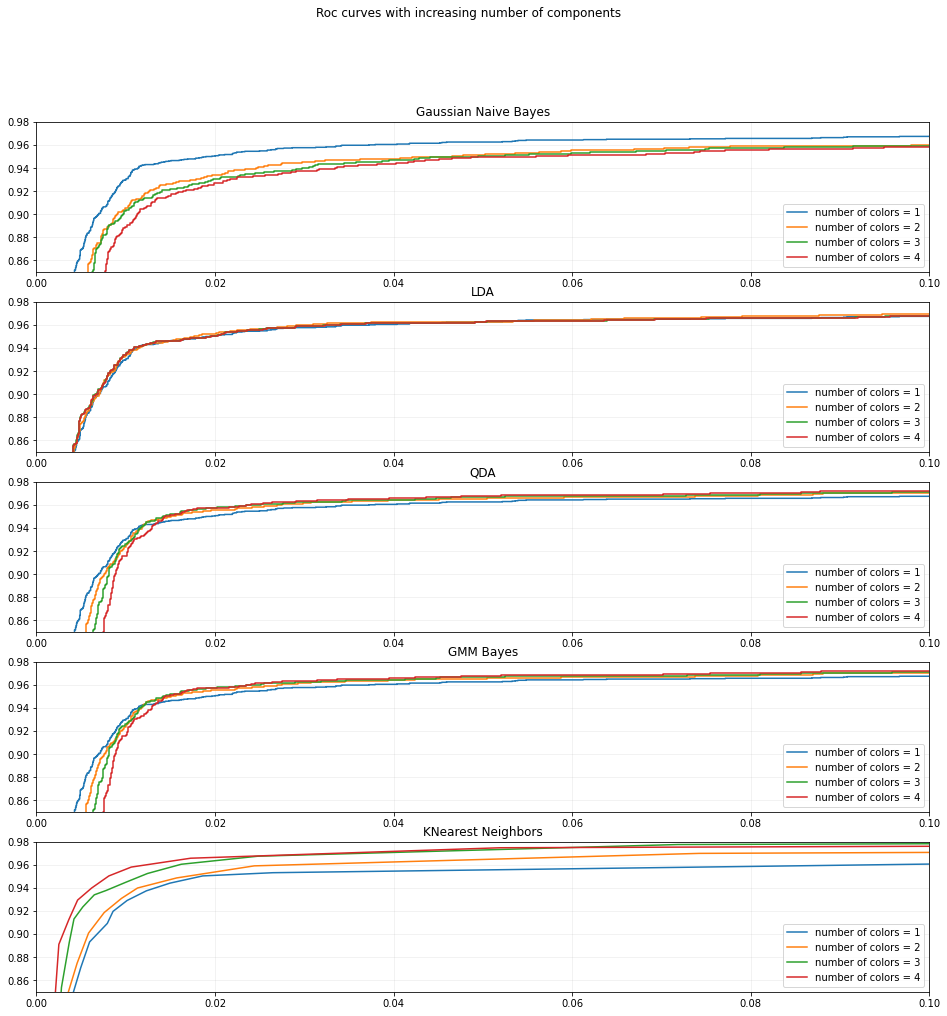

In [11]:
fig, axs = plt.subplots(5, figsize = (16,16))
fig.suptitle("Roc curves with increasing number of components")
method_i = 0
knn_best = np.array([list(best_knn[i].values()) for i in range(4)])[:,0]

def comp_cont(test, pred):
    C = confusion_matrix(test, pred)
    tn, fp, fn, tp = C.ravel()
    comp = tp/(tp+fn)
    cont = fp/(tp+fp)
    return comp, cont

comp = []
cont = []

for name, method in classifier.items():
    for c in range(4):
        if name == 'KNearest Neighbors':
            clf = method(n_neighbors = knn_best[c])
        else:
            clf = method()
            
        ncomp = 2
        clf.fit(colors_train[:, 0:c+1], label_train)
        label_prob = clf.predict_proba(colors_test[:, 0:c+1])[:,1]
        label_pred = clf.predict(colors_test[:, 0:c+1])
        fpr, tpr, thresh = roc_curve(label_test, label_prob)
        precision, recall, thresh2 = precision_recall_curve(label_test, label_prob)
        completeness, contamination = comp_cont(label_test, label_pred)
        comp.append(completeness)
        cont.append(contamination)
        axs[method_i].plot(fpr, tpr, label = 'number of colors = ' +str(c +1))
        axs[method_i].set_xlim(0, 0.1)
        axs[method_i].set_ylim(0.85, 0.98)
    axs[method_i].set_title(name)
    axs[method_i].grid(alpha = 0.2)
    axs[method_i].legend()
    method_i +=1

comp = np.reshape(comp,(5,4))
cont = np.reshape(cont,(5,4))


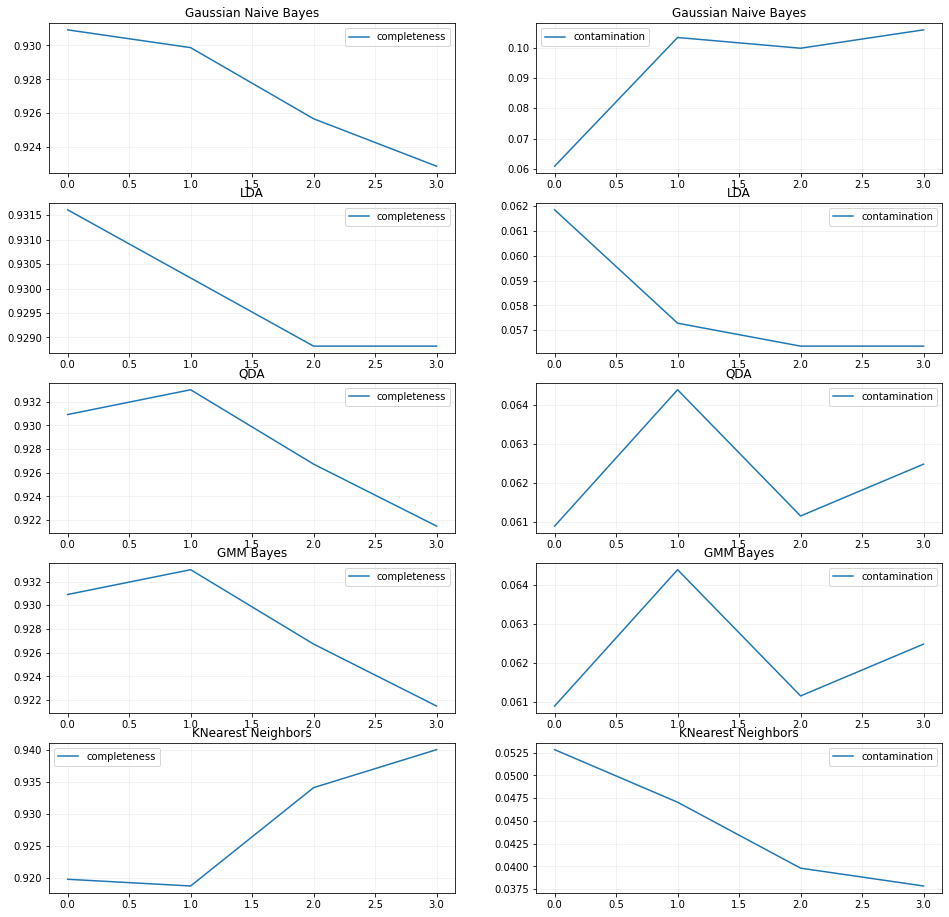

In [12]:
fig, axs = plt.subplots(5,2, figsize = (16,16))
for i in range(5):

    axs[i,0].plot(np.arange(4), comp[i], label = 'completeness')
    axs[i,0].grid(alpha = 0.2)
    axs[i,0].legend()
    axs[i,0].set_title(keys[i])
    axs[i,0].grid(alpha = 0.2)
    axs[i,0].legend()
    
for i in range(5):
    axs[i,1].plot(np.arange(4), cont[i], label = 'contamination')
    axs[i,1].grid(alpha = 0.2)
    axs[i,1].legend()
    axs[i,1].set_title(keys[i])
    axs[i,1].grid(alpha = 0.2)
    axs[i,1].legend()

## Time to get your hands dirty. Galaxies vs quasars with neural networks.

Let's go back to our galaxy vs quasar data we've used in a previous exercise. 

1. Read in SDSS galaxy color data from `solutions/galaxyquasar.csv`. Create arrays for the $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create an array with the class labels where galaxy=$0$ and quasar=$1$. 

2. Now we're going to fit a neural network classifier. First, scale your data appropriately and do a 30% train/test split.

3. Now train the classifier. Use one the package among those we've seen. These include Tensorflow via keras, pytorch, and the [multilayer perceptron classifier](sklearn.neural_network.MLPClassifier) implemented in scikit-learn. My solution uses the latter, but this is an opportunity to pick the one you're most interested in learning. 

3. Start from a network architecture with a single hidden layer with 5 neurons, using the `adam` solver, the `relu` activation function, and a learninig rate of `0.001`. Plot the resulting ROC curve. 

4. Now let's optimize the hyperparameters of your network. Explore different hyperparameters and see what fits the data best.  Do you best now to optimize the network architecture. Be creative!

5. Is your best result comparable with the simpler classifiers we've seen before? Do we need deep learning here? If yes, which features are captured best?


A few tips:

- In scikit-learn, remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.
- If it takes too long, run the hyperparameter optimization on a subset of the training set. Then retrain the full network using the best hyperparameters only.
- On cross validation, for scikit learn we've seen how to use `GridSearchCV` already. For Tensorflow, there's a really cool tool called [Tensorboard](https://www.tensorflow.org/tensorboard) (but don't start learning about it now, it takes a while to get it up and running).


In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as torchdata
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
from torch.nn import ReLU
from torch.nn import Sigmoid
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader

In [47]:
sc = StandardScaler()

(colors_val, colors_test_1), (label_val, label_test_1) = split_samples(colors_test, label_test, [0.5, 0.5],
                                                     random_state=0)

colors_train = sc.fit_transform(colors_train)
colors_test = sc.fit_transform(colors_test)
colors_val = sc.fit_transform(colors_val)


In [29]:
###training data

class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
    
    def __len__(self):
        return len(self.X_data)
    
    
train_data = TrainData(torch.FloatTensor(colors_train), torch.FloatTensor(label_train))
val_data = TrainData(torch.FloatTensor(colors_val), torch.FloatTensor(label_val))

###test data

class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
    
    def __len__(self):
        return len(self.X_data)
    
    
test_data = TestData(torch.FloatTensor(colors_test_1))

EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

traindataloader = DataLoader(train_data, batch_size = BATCH_SIZE , shuffle = True)
valdataloader = DataLoader(val_data, batch_size = BATCH_SIZE)
testdataloader = DataLoader(test_data, batch_size = 1)

In [30]:
#neural network structure
input_dim = 4
hidden_dim = 5
output_dim = 1

class net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(net, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(input_dim, hidden_dim) 
        self.layer_2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer_out = nn.Linear(hidden_dim, output_dim) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(hidden_dim)
        self.batchnorm2 = nn.BatchNorm1d(hidden_dim)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

model = net(input_dim, hidden_dim, output_dim)
print(model)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

net(
  (layer_1): Linear(in_features=4, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=5, bias=True)
  (layer_out): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
cpu


net(
  (layer_1): Linear(in_features=4, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=5, bias=True)
  (layer_out): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [31]:
criterion = nn.BCEWithLogitsLoss()
#criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

def compute_accuracy(y_pred, y_test):
    
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [32]:
##Train the model

model.train()
train_loss = []
accuracy = []

val_loss=[]
val_acc=[]
label_pred_list = []

for t in range(1, EPOCHS +1):
    epoch_loss = 0
    epoch_acc = 0
    for colors_batch, label_batch in traindataloader:
        colors_batch, label_batch = colors_batch.to(device), label_batch.to(device)
        
        #initialize parameter gradients to 0
        optimizer.zero_grad()
        
        #forward+backward+optimize
        label_pred = model(colors_batch) 
        loss = criterion(label_pred, label_batch.unsqueeze(1))
        acc = compute_accuracy(label_pred, label_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    
    train_loss.append(epoch_loss/len(traindataloader))
    accuracy.append(epoch_acc/len(traindataloader))
    
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    ll = []
    with torch.no_grad():
        for colors_batch, label_batch in valdataloader:
            colors_batch, label_batch = colors_batch.to(device), label_batch.to(device)

            label_pred=model(colors_batch)
            loss= criterion(label_pred, label_batch.unsqueeze(1))
            epoch_loss+=loss.item()
            acc = compute_accuracy(label_pred, label_batch.unsqueeze(1))
            epoch_acc+=acc.item()

       
    val_loss.append(epoch_loss/len(valdataloader))
    val_acc.append(epoch_acc/len(valdataloader))    
    

In [33]:
for t in range(EPOCHS):
    print(f'Epoch {t+0:03}: | Train Loss: {train_loss[t]:.5f} | Train Acc: {accuracy[t]:.3f}| Val Loss: {val_loss[t]:.5f} | Val Acc: {val_acc[t]:.3f}')


Epoch 000: | Train Loss: 0.41270 | Train Acc: 86.949| Val Loss: 0.16464 | Val Acc: 97.924
Epoch 001: | Train Loss: 0.08313 | Train Acc: 98.115| Val Loss: 0.06756 | Val Acc: 98.204
Epoch 002: | Train Loss: 0.06955 | Train Acc: 98.145| Val Loss: 0.06464 | Val Acc: 98.344
Epoch 003: | Train Loss: 0.06767 | Train Acc: 98.166| Val Loss: 0.06207 | Val Acc: 98.166
Epoch 004: | Train Loss: 0.06377 | Train Acc: 98.256| Val Loss: 0.05946 | Val Acc: 98.369
Epoch 005: | Train Loss: 0.06317 | Train Acc: 98.241| Val Loss: 0.05950 | Val Acc: 98.376
Epoch 006: | Train Loss: 0.06015 | Train Acc: 98.281| Val Loss: 0.05917 | Val Acc: 98.357
Epoch 007: | Train Loss: 0.05946 | Train Acc: 98.277| Val Loss: 0.05978 | Val Acc: 98.363
Epoch 008: | Train Loss: 0.05882 | Train Acc: 98.284| Val Loss: 0.05892 | Val Acc: 98.325
Epoch 009: | Train Loss: 0.05886 | Train Acc: 98.320| Val Loss: 0.05823 | Val Acc: 98.427
Epoch 010: | Train Loss: 0.05824 | Train Acc: 98.305| Val Loss: 0.05846 | Val Acc: 98.331
Epoch 011:

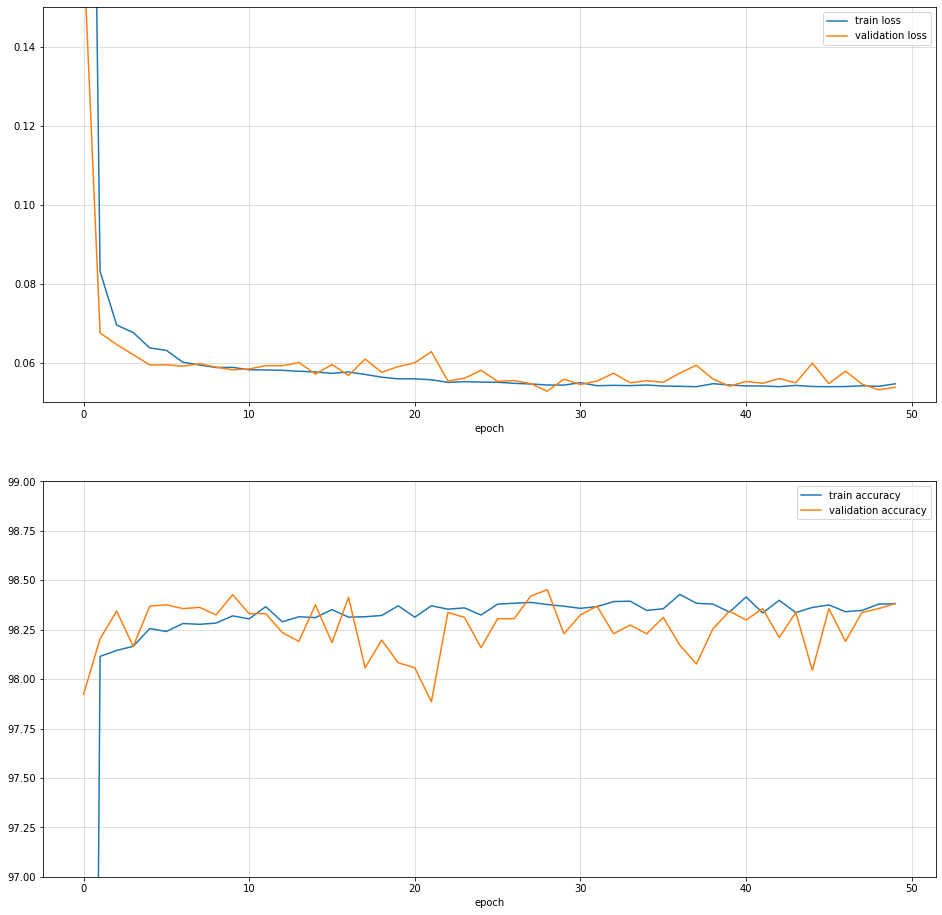

In [34]:
fig, axs = plt.subplots(2, figsize = (16,16))
axs[0].plot(np.arange(EPOCHS), train_loss, label = 'train loss')
axs[0].plot(np.arange(EPOCHS), val_loss, label = 'validation loss')
axs[0].set_ylim(0.05, 0.15)
axs[0].grid(alpha = 0.5)
axs[0].set_xlabel('epoch')
axs[0].legend()

axs[1].plot(np.arange(EPOCHS), accuracy, label = 'train accuracy')
axs[1].plot(np.arange(EPOCHS), val_acc, label = 'validation accuracy')
axs[1].set_ylim(97, 99)
axs[1].grid(alpha = 0.5)
axs[1].set_xlabel('epoch')
axs[1].legend()



Contamination =  0.0398576512455516
Completeness =  0.9420391061452514


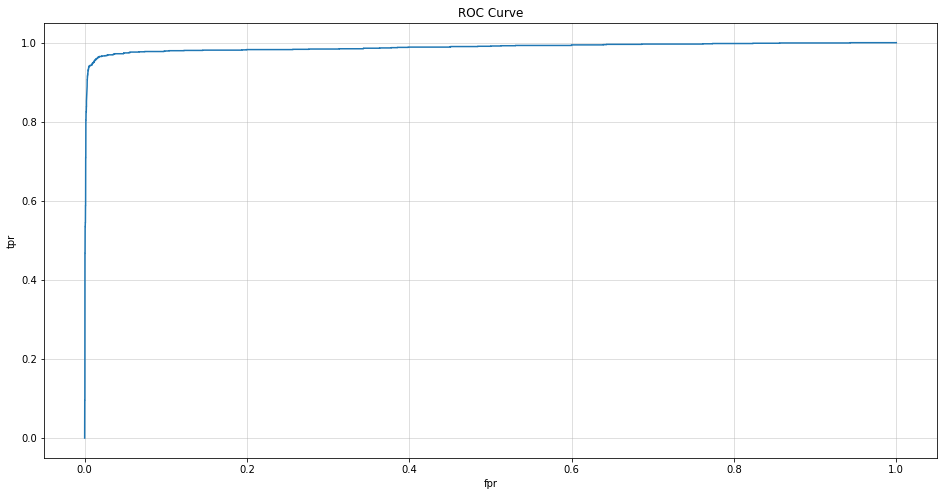

In [38]:
##test model and plot roc curve
label_prob = torch.sigmoid(model(torch.from_numpy(colors_test_1.astype(np.float32))))

label_pred = torch.round(label_prob).detach().numpy().flatten()

label_prob = label_prob.detach().numpy().flatten()

fpr, tpr, thresh = roc_curve(label_test_1, label_prob)
completeness, contamination= completeness_contamination(label_pred, label_test_1)

fig = plt.figure(figsize = (16,8))
#plt.xlim(0, 0.4)
#plt.ylim(0.6, 1)
plt.plot(fpr, tpr)
plt.grid(alpha = 0.5)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC Curve')

print('Contamination = ', contamination)
print('Completeness = ', completeness)

In [54]:
##optimization of the neural network
import optuna
def set_nhidden(hiddim):
    model = net(input_dim, hiddim, output_dim)
    return model


def train_model(model, criterion, optimizer, traindataloader, valdataloader, epochs):
    
    model.train()
    EPOCHS = epochs
    for t in range(1, EPOCHS +1):
        
        
        
        for colors_batch, label_batch in traindataloader:
            colors_batch, label_batch = colors_batch.to(device), label_batch.to(device)

            #initialize parameter gradients to 0
            optimizer.zero_grad()

            #forward+backward+optimize
            label_pred = model(colors_batch) 
            loss = criterion(label_pred, label_batch.unsqueeze(1))
            loss.backward()
            optimizer.step()
            
        validation_accuracy = 0   
        model.eval()
        model_accuracy = 0
        with torch.no_grad():
            for colors_batch, label_batch in valdataloader:
                colors_batch, label_batch = colors_batch.to(device), label_batch.to(device)

                outputs=model(colors_batch)
                acc = compute_accuracy(outputs, label_batch.unsqueeze(1))
                validation_accuracy += acc.item()
                
    return validation_accuracy

epo_trial = 20


def objective(trial):
    params = {"hidden_dim": trial.suggest_int('hidden_dim', 5, 50), "lr": trial.suggest_loguniform('lr', 1e-4, 1e-2), "optimizer_name": trial.suggest_categorical('optimizer_name',["SGD", "Adam"])}
    
    #pretrained model
    model = set_nhidden(params["hidden_dim"])
    model.to(device)
    
    #define criterion
    criterion = nn.BCEWithLogitsLoss()
    
    #optimizer
    optimizer = getattr(torch.optim, params["optimizer_name"])(model.parameters(), lr=params["lr"])
    
    n_epochs = epo_trial
    #train
    best_acc = train_model(model, criterion, optimizer, traindataloader, valdataloader, n_epochs)
    
    
    return best_acc/len(valdataloader)



In [177]:
sampler = optuna.samplers.TPESampler()
study = optuna.create_study(sampler = sampler, pruner = optuna.pruners.MedianPruner(n_startup_trials=2, n_warmup_steps=5, interval_steps=3), direction = 'maximize')
study.optimize(func=objective, n_trials = 40)

[I 2023-01-08 11:24:32,020] A new study created in memory with name: no-name-39a6128c-d453-4236-b43a-d90bf539211e
/tmp/ipykernel_26142/789204115.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  params = {"hidden_dim": trial.suggest_int('hidden_dim', 5, 50), "lr": trial.suggest_loguniform('lr', 1e-4, 1e-2), "optimizer_name": trial.suggest_categorical('optimizer_name',["SGD", "Adam"])}
[I 2023-01-08 11:24:40,756] Trial 0 finished with value: 98.19745222929936 and parameters: {'hidden_dim': 44, 'lr': 0.0010219843729683085, 'optimizer_name': 'SGD'}. Best is trial 0 with value: 98.19745222929936.
[I 2023-01-08 11:24:49,157] Trial 1 finished with value: 98.20382165605096 and parameters: {'hidden_dim': 9, 'lr': 0.0010029898223570526, 'optimizer_name': 'SGD'}. Best is trial 1 with value: 98.20382165605096.
[I 2023-01-0

[I 2023-01-08 11:31:36,094] Trial 34 finished with value: 98.35031847133757 and parameters: {'hidden_dim': 34, 'lr': 0.001668353193927418, 'optimizer_name': 'SGD'}. Best is trial 29 with value: 98.44585987261146.
[I 2023-01-08 11:31:49,304] Trial 35 finished with value: 98.23566878980891 and parameters: {'hidden_dim': 45, 'lr': 0.0010909690070450223, 'optimizer_name': 'Adam'}. Best is trial 29 with value: 98.44585987261146.
[I 2023-01-08 11:32:02,343] Trial 36 finished with value: 98.40127388535032 and parameters: {'hidden_dim': 38, 'lr': 0.00020554332151365476, 'optimizer_name': 'Adam'}. Best is trial 29 with value: 98.44585987261146.
[I 2023-01-08 11:32:11,900] Trial 37 finished with value: 97.75796178343948 and parameters: {'hidden_dim': 28, 'lr': 0.00010158682640030063, 'optimizer_name': 'SGD'}. Best is trial 29 with value: 98.44585987261146.
[I 2023-01-08 11:32:24,569] Trial 38 finished with value: 98.30573248407643 and parameters: {'hidden_dim': 11, 'lr': 0.00024346103204815394, 

In [178]:
import joblib
joblib.dump(study, "study.pkl")
study = joblib.load("study.pkl")
print("Best trial until now:")
print(" Value: ", study.best_trial.value)
print(" Params: ")

for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

Best trial until now:
 Value:  98.44585987261146
 Params: 
    hidden_dim: 38
    lr: 0.0007371686255018549
    optimizer_name: Adam


In [179]:
values_best = list(study.best_trial.params.items())
print(values_best)
best_hidden_dim = values_best[0][1]
best_lr = values_best[1][1]
best_opt = values_best[2][1]
if best_opt == 'Adam':
    best_optimizer = torch.optim.Adam(model.parameters(), lr=best_lr)
if best_opt == 'SGD':
    best_optimizer = torch.optim.SGD(model.parameters(), lr=best_lr)

[('hidden_dim', 38), ('lr', 0.0007371686255018549), ('optimizer_name', 'Adam')]


In [183]:
#train model
best_model = net(input_dim, best_hidden_dim, output_dim)
print(best_model)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
best_model.to(device) 

best_model.train()

train_loss = []
accuracy = []

val_loss=[]
val_acc=[]
label_pred_list = []

for t in range(1, EPOCHS +1):
    epoch_loss = 0
    epoch_acc = 0
    for colors_batch, label_batch in traindataloader:
        colors_batch, label_batch = colors_batch.to(device), label_batch.to(device)
        
        #initialize parameter gradients to 0
        best_optimizer.zero_grad()
        
        #forward+backward+optimize
        label_pred = best_model(colors_batch) 
        loss = criterion(label_pred, label_batch.unsqueeze(1))
        acc = compute_accuracy(label_pred, label_batch.unsqueeze(1))
        loss.backward()
        best_optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    
    train_loss.append(epoch_loss/len(traindataloader))
    accuracy.append(epoch_acc/len(traindataloader))
    
    epoch_loss = 0
    epoch_acc = 0
    best_model.eval()
    ll = []
    with torch.no_grad():
        for colors_batch, label_batch in valdataloader:
            colors_batch, label_batch = colors_batch.to(device), label_batch.to(device)

            label_pred=best_model(colors_batch)
            loss= criterion(label_pred, label_batch.unsqueeze(1))
            epoch_loss+=loss.item()
            acc = compute_accuracy(label_pred, label_batch.unsqueeze(1))
            epoch_acc+=acc.item()

       
    val_loss.append(epoch_loss/len(valdataloader))
    val_acc.append(epoch_acc/len(valdataloader))    


net(
  (layer_1): Linear(in_features=4, out_features=38, bias=True)
  (layer_2): Linear(in_features=38, out_features=38, bias=True)
  (layer_out): Linear(in_features=38, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(38, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(38, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
cpu


Completeness =  0.9706703910614525
Contamination =  0.3468045112781955


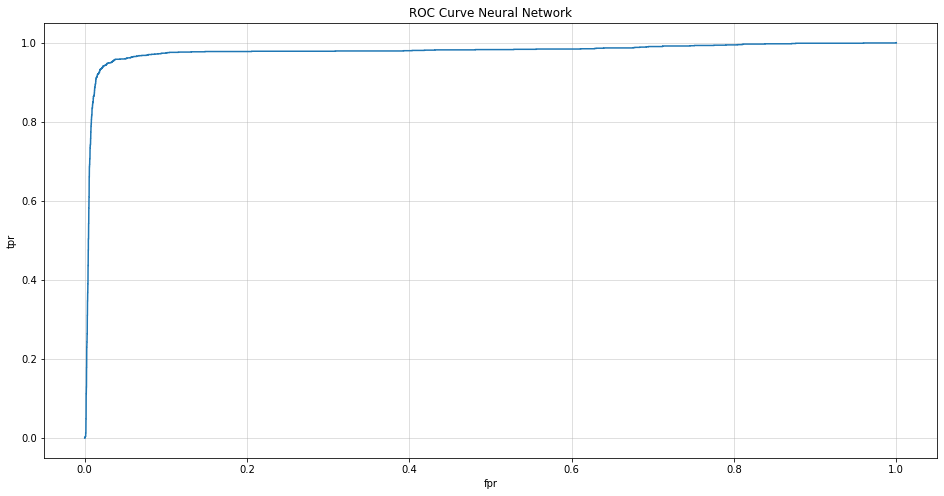

In [184]:
##test model and plot roc curve
label_prob = torch.sigmoid(best_model(torch.from_numpy(colors_test_1.astype(np.float32))))

label_pred = torch.round(label_prob).detach().numpy().flatten()

label_prob = label_prob.detach().numpy().flatten()

fpr_nn, tpr_nn, thresh_nn = roc_curve(label_test_1, label_prob)
completeness_nn, contamination_nn  = completeness_contamination(label_pred, label_test_1)

fig = plt.figure(figsize = (16,8))
plt.plot(fpr_nn, tpr_nn)
plt.grid(alpha = 0.5)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC Curve Neural Network')

print('Completeness = ', completeness_nn)
print('Contamination = ', contamination_nn)

[13 10 12  9]
Gaussian Naive Bayes| Completeness =  0.8809048569527611  | Contamination 0.07606420097697139
LDA| Completeness =  0.9439517559418233  | Contamination 0.07152826238660154
QDA| Completeness =  0.9315972222222222  | Contamination 0.06385205861828332
GMM Bayes| Completeness =  0.9315972222222222  | Contamination 0.06385205861828332
KNearest Neighbors| Completeness =  0.9519803715387312  | Contamination 0.052337752965806
NN | Completeness =  0.9706703910614525  | Contamination 0.3468045112781955


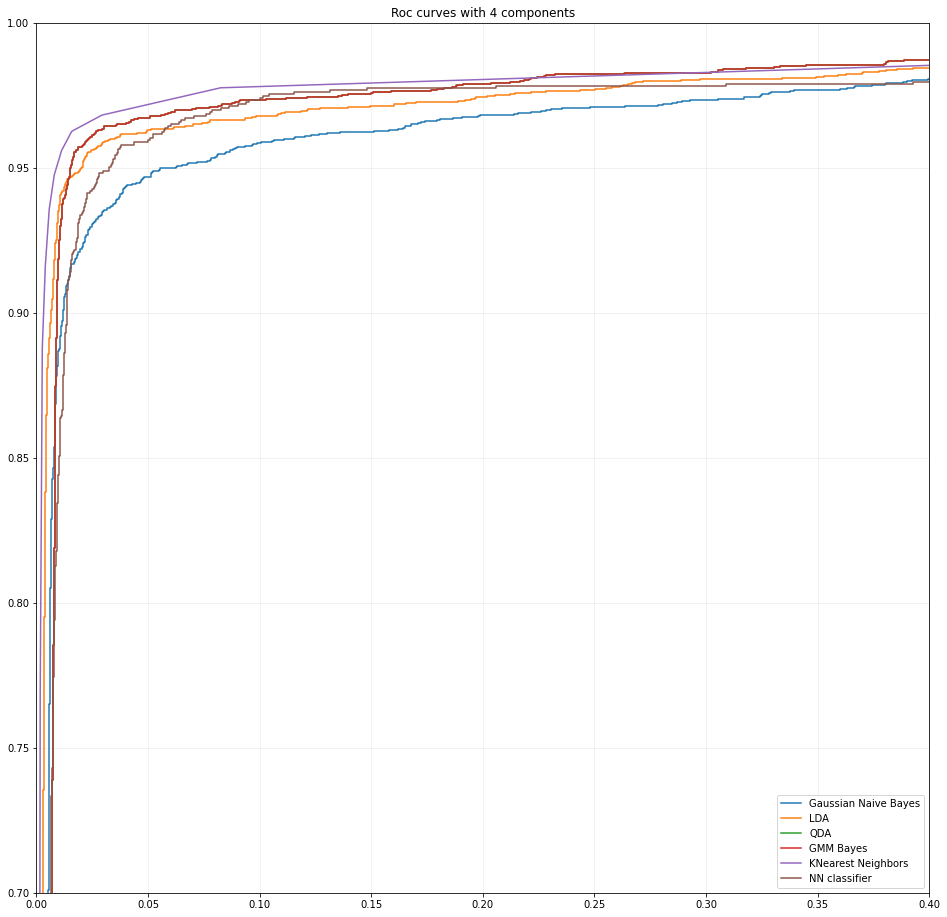

In [185]:
fig = plt.figure(figsize = (16,16))
method_i = 0
knn_best = np.array([list(best_knn[i].values()) for i in range(4)])[:,0]
print(knn_best)
comp = []
cont = []

for name, method in classifier.items():
    if name == 'KNearest Neighbors':
        clf = method(n_neighbors = 9)
    else:
        clf = method()

    ncomp = 2
    clf.fit(colors_train, label_train)
    label_prob = clf.predict_proba(colors_test)[:,1]
    label_pred = clf.predict(colors_test)
    fpr, tpr, thresh = roc_curve(label_test, label_prob)
    completeness, contamination = completeness_contamination(label_test, label_pred)
    comp.append(completeness)
    cont.append(contamination)
    plt.plot(fpr, tpr, label = name)
    plt.xlim(0, 0.4)
    plt.ylim(0.7, 1)
    print(name + '| Completeness = ', completeness, ' | Contamination', contamination)
print('NN | Completeness = ', completeness_nn, ' | Contamination', contamination_nn)
plt.plot(fpr_nn, tpr_nn, label = 'NN classifier')
plt.title("Roc curves with 4 components")
plt.grid(alpha = 0.2)
plt.legend()

